# Project - EDA with Pandas Using the Boston Housing Data

## Introduction

In this section you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this a more free form project you'll get a chance to practice all of these skills with the Boston Housing data set, which contains housing values in suburbs of Boston. The Boston Housing Data is commonly used by aspiring data scientists.

## Objectives

You will be able to:

* Load csv files using Pandas
* Find variables with high correlation
* Create box plots

## Goals

Use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At a minimum, this should include:

* Loading the data (which is stored in the file `train.csv`)
* Use built-in python functions to explore measures of centrality and dispersion for at least 3 variables
* Create *meaningful* subsets of the data using selection operations using `.loc`, `.iloc` or related operations. Explain why you used the chosen subsets and do this for 3 possible 2-way splits. State how you think the 2 measures of centrality and/or dispersion might be different for each subset of the data. Examples of potential splits:
    - Create a 2 new dataframes based on your existing data, where one contains all the properties next to the Charles river, and the other one contains properties that aren't.
    - Create 2 new dataframes based on a certain split for crime rate.
* Next, use histograms and scatterplots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

## Variable Descriptions

This data frame contains the following columns:

#### crim  
per capita crime rate by town.

#### zn  
proportion of residential land zoned for lots over 25,000 sq.ft.

#### indus  
proportion of non-retail business acres per town.

#### chas  
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

#### nox  
nitrogen oxides concentration (parts per 10 million).

#### rm  
average number of rooms per dwelling.

#### age  
proportion of owner-occupied units built prior to 1940.

#### dis  
weighted mean of distances to five Boston employment centers.

#### rad  
index of accessibility to radial highways.

#### tax  
full-value property-tax rate per $10,000.

#### ptratio  
pupil-teacher ratio by town.

#### black  
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

#### lstat  
lower status of the population (percent).

#### medv  
median value of owner-occupied homes in $10000s.
  
  
  
Source
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.

## Summary

Congratulations, you've completed your first "freeform" exploratory data analysis of a popular data set!

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv('train.csv') 
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [20]:
df['crim'].mean()

3.360341471471471

In [21]:
df['crim'].median()

0.26169000000000003

In [22]:
df['crim'].mode()

0    0.01501
dtype: float64

In [25]:
df['crim'].std()

7.352271836781107

In [26]:
df['crim'].var()

54.05590116192462

In [29]:
df['dis'].mean()

3.709933633633634

In [30]:
df['dis'].median()

3.0923

In [31]:
df['dis'].mode()

0    3.6519
1    4.8122
2    5.2873
3    5.4007
4    5.4917
5    5.7209
6    6.4798
7    6.8147
dtype: float64

In [32]:
df['dis'].std()

1.9811230514406997

In [33]:
df['dis'].var()

3.924848544949709

In [34]:
df['dis'].mean()

3.709933633633634

In [35]:
df['rm'].mean()

6.2656186186186185

In [36]:
df['rm'].median()

6.202000000000001

In [37]:
df['rm'].mode()

0    6.127
1    6.229
dtype: float64

In [38]:
df['rm'].std()

0.7039515757334478

In [39]:
df['rm'].var()

0.495547820977604

In [100]:
df['crim_vs_ptratio'] = ((df['crim'] > (df['crim']).mean()) & (df['ptratio'] < (df['ptratio']).mean()))
#Checking for a correlation between the crime rate and pupil/teacher ratio by town

In [68]:
rad_vs_medv = ((df['rad']) > (df['rad'].mean())) & ((df['medv']) < (df['medv'].mean()))
#Checking for a correlation between index or highway accessibility and median value of owned homes

In [70]:
dis_vs_black = (((df['dis']) < (df['dis'].mean())) & ((df['black'] > df['black'].mean()))) 
#Checking for a correlation between mean of distanced from 5 boston employments and Black population

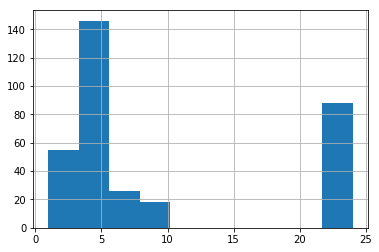

In [92]:
df.rad.hist()

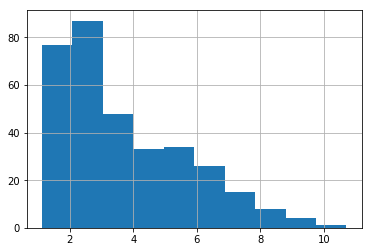

In [93]:
df.dis.hist()

In [102]:
for n, feat1 in enumerate(df.columns):
    for feat2 in df.columns[n+1:]:
        r2 = np.corrcoef(df[feat1], df[feat2])[0][1]
        if r2 > .7:
            print('{} and {} have a correlation coefficient of {}!'.format(feat1, feat2, r2))

ID and rad have a correlation coefficient of 0.7075262711727565!
indus and nox have a correlation coefficient of 0.7500874390908758!
indus and tax have a correlation coefficient of 0.7083132697607584!
nox and age have a correlation coefficient of 0.735999582842286!
rad and tax have a correlation coefficient of 0.9035618963206117!
